# Q3
Update the sample data set inherited from Q1.

In [2]:
import numpy as np
X = np.array([10,35,18,45,58,65,82,74])
Y = np.array([500,1200,1000,1800,1300,1000,400,800])

Ploting the data

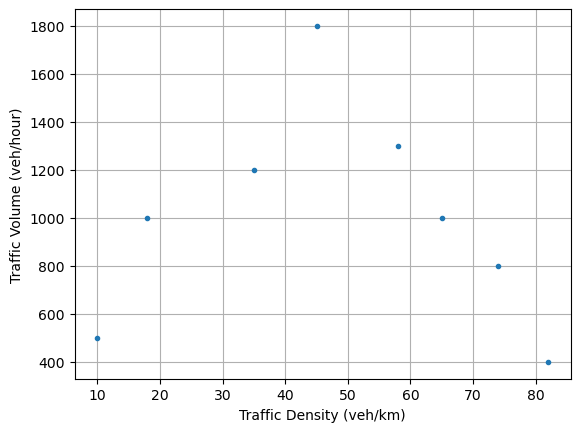

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, Y, '.', label='raw data')
plt.xlabel('Traffic Density (veh/km)')
plt.ylabel('Traffic Volume (veh/hour)')
plt.grid()

Since the model to be built is in 2nd order derivitive, create the design matrix up to 2nd order

In [6]:
PHI = np.vander(X,3,increasing=True)
print (PHI)

[[   1   10  100]
 [   1   35 1225]
 [   1   18  324]
 [   1   45 2025]
 [   1   58 3364]
 [   1   65 4225]
 [   1   82 6724]
 [   1   74 5476]]


Using the close form matrix solution to solve for w

In [7]:
w = np.linalg.inv(PHI.T@PHI)@PHI.T @ Y.reshape(-1,1)
print(w)

[[-102.69284032]
 [  71.70391366]
 [  -0.8067115 ]]


Plot out the data 

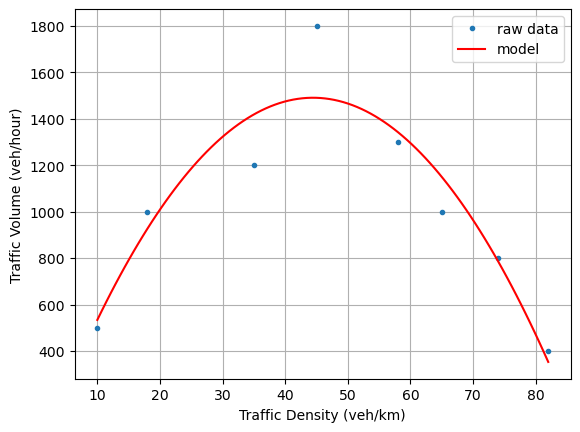

In [8]:
import matplotlib.pyplot as plt

plt.plot(X, Y, '.', label='raw data')

# create 1000 equally spaced points between -10 and 10
px = np.linspace(min(X), max(X), 100)
py = np.vander(px,3,increasing=True)@w
plt.plot(px,py, '-r', label='model')
plt.xlabel('Traffic Density (veh/km)')
plt.ylabel('Traffic Volume (veh/hour)')
plt.grid()
plt.legend(loc=0)

If the predicted traffic using this arterial is 1000 veh/hour, what will be the estimated
traffic density? 

In [12]:
quad_equation=np.flip(w.reshape(-1))-[0,0,1000]
ans1 = np.roots(quad_equation)
print(f'The traffic density for that predict the traffic volume at 1000 veh/hour are {ans1[0]:.3f} veh/km and {ans1[1]:.3f} veh/km')

The traffic density for that predict the traffic volume at 1000 veh/hour are 69.104 veh/km and 19.780 veh/km


What will be the traffic volume if the density goes to 90 veh/km?

In [10]:
ans2 = np.vander(np.full(1,90),3,increasing=True)@w
print(ans2[0])

[-183.70373998]


The predicted traffic volume is outside the estimated maximum traffic capacity of the road